<a href="https://colab.research.google.com/github/rohitk140797k/Big-mart-Sales/blob/master/Classification_MNIST_DNN_Keras_with_LeakyRELU_Momemtum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Load tensorflow

In [0]:
import tensorflow as tf
#tf.enable_eager_execution()
#tf.set_random_seed(42)

### Collect Data

In [0]:
(trainX, trainY),(testX, testY) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


### Convert Output label to multiple values

In [0]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

## Build the Graph

In [0]:
#Initialize Sequential model
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

## Build the Graph...

In [0]:
#Add 1st hidden layer
model.add(tf.keras.layers.Dense(200))
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.BatchNormalization())

In [0]:
#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(100))
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.BatchNormalization())

In [0]:
#Add 3rd hidden layer
model.add(tf.keras.layers.Dense(60))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.Dropout(0.3))

In [0]:
#Add 4th hidden layer
model.add(tf.keras.layers.Dense(30))
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.BatchNormalization())

In [0]:
#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

## Build the Graph...

In [0]:
#Compile the model
sgd_op = tf.keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd_op, loss='categorical_crossentropy', 
              metrics=['accuracy'])

## Review model

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 200)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 200)               800       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 100)               0

## Train the model

In [0]:
model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=5,
          batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3419 - accuracy: 0.8972 - val_loss: 0.4309 - val_accuracy: 0.9497
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1995 - accuracy: 0.9392 - val_loss: 0.3852 - val_accuracy: 0.9621
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1561 - accuracy: 0.9516 - val_loss: 0.2953 - val_accuracy: 0.9648
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1329 - accuracy: 0.9589 - val_loss: 0.4373 - val_accuracy: 0.9691
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1188 - accuracy: 0.9633 - val_loss: 0.8675 - val_accuracy: 0.9688


In [0]:
model.save('mnist_dnn_v1.h5')

In [0]:
!ls -l

total 1568
-rw-r--r-- 1 root root 1601064 May 21 05:45 mnist_dnn_v1.h5
drwxr-xr-x 1 root root    4096 May 13 16:29 sample_data


In [0]:
_,(testX, testY) = tf.keras.datasets.mnist.load_data()

In [0]:
testX[0:1].shape

(1, 28, 28)

In [0]:
#Actual Label for the first example in test dataset
print(testY[2])

#Model prediction
prediction = model.predict(testX[2:3])

#Print prediction
print(prediction)

1
[[4.2869171e-08 9.9998844e-01 1.5621374e-06 2.0122397e-07 3.2921972e-07
  4.1646098e-07 2.1745270e-06 5.6017252e-06 1.2754563e-06 1.5891198e-08]]


In [0]:
import numpy as np

#Get predicted number with highest probability
predicted_num = np.argmax(prediction[0])

#Print the number
print(predicted_num)

1


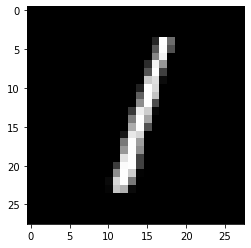

In [0]:
#Lets print the image as well
import matplotlib.pyplot as plt

plt.imshow(testX[2],cmap='gray')